Membrana vibratoria

$$ \frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
 $$

que satisfaga la condición en la frontera

\begin{equation}
u = 0 \quad \text{en la frontera de la membrana para toda } t \geq 0
\end{equation}

y las dos condiciones iniciales

\begin{equation}
u(x, y, 0) = f(x, y) \quad \text{[dado el desplazamiento inicial } f(x, y)\text{]}
\end{equation}

y

\begin{equation}
\left. \frac{\partial u}{\partial t} \right|_{t=0} = g(x, y) \quad \text{[dada la velocidad inicial } g(x, y)\text{]}
\end{equation}

$u(x, y, t)$ da el desplazamiento del punto $(x, y)$ de la membrana desde el reposo ($u = 0$) en el tiempo $t$. Se observa que las condiciones (2)-(4) son similares a las de la cuerda vibratoria.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Parámetros del problema
a = 4  # Longitud en x
b = 2  # Longitud en y
c = 1  # Velocidad de propagación
M = 3  # Términos en x
N = 3  # Términos en y
Nx = 100
Ny = 100



# Condición inicial f(x,y)
def f_xy(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)



# Coeficientes A_mn
def A_mn(m, n):
    x = np.linspace(0, a, Nx)
    y = np.linspace(0, b, Ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    integrando = f_xy(X, Y) * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
    dx = a / (Nx - 1)
    dy = b / (Ny - 1)
    integral = np.sum(integrando) * dx * dy
    return (4 / (a * b)) * integral


# Solución u(x,y,t)
def u(x, y, t):
    suma = 0.0
    for m in range(1, M+1):
        for n in range(1, N+1):
            Amn = A_mn(m, n)
            omega_mn = c * np.pi * np.sqrt((m / a)**2 + (n / b)**2)
            suma += Amn * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.cos(omega_mn * t)
    return suma



# Coordenadas para evaluación
X_eval = [1, 2, 3]
Y_eval = [0.5, 1.0, 1.5]
T_eval = [0, 0.5, 1]



# Evaluación numérica paso a paso
print("SOLUCIÓN NUMÉRICA U(X,Y,T) PASO A PASO:\n")
for t in T_eval:
    print(f"t = {t}")
    for x in X_eval:
        for y in Y_eval:
            valor = u(x, y, t)
            print(f"u({x:.1f}, {y:.1f}, {t:.1f}) = {valor:.6f}")

SOLUCIÓN NUMÉRICA U(X,Y,T) PASO A PASO:

t = 0
u(1.0, 0.5, 0.0) = 0.229097
u(1.0, 1.0, 0.0) = 0.300850
u(1.0, 1.5, 0.0) = 0.229097
u(2.0, 0.5, 0.0) = 0.300850
u(2.0, 1.0, 0.0) = 0.395075
u(2.0, 1.5, 0.0) = 0.300850
u(3.0, 0.5, 0.0) = 0.229097
u(3.0, 1.0, 0.0) = 0.300850
u(3.0, 1.5, 0.0) = 0.229097
t = 0.5
u(1.0, 0.5, 0.5) = 0.131245
u(1.0, 1.0, 0.5) = 0.202615
u(1.0, 1.5, 0.5) = 0.131245
u(2.0, 0.5, 0.5) = 0.182888
u(2.0, 1.0, 0.5) = 0.280650
u(2.0, 1.5, 0.5) = 0.182888
u(3.0, 0.5, 0.5) = 0.131245
u(3.0, 1.0, 0.5) = 0.202615
u(3.0, 1.5, 0.5) = 0.131245
t = 1
u(1.0, 0.5, 1.0) = -0.046118
u(1.0, 1.0, 1.0) = -0.067107
u(1.0, 1.5, 1.0) = -0.046118
u(2.0, 0.5, 1.0) = -0.044404
u(2.0, 1.0, 1.0) = -0.064229
u(2.0, 1.5, 1.0) = -0.044404
u(3.0, 0.5, 1.0) = -0.046118
u(3.0, 1.0, 1.0) = -0.067107
u(3.0, 1.5, 1.0) = -0.046118


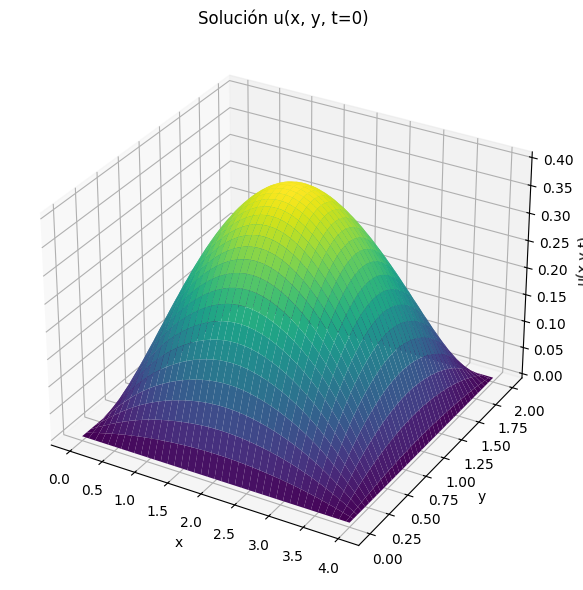

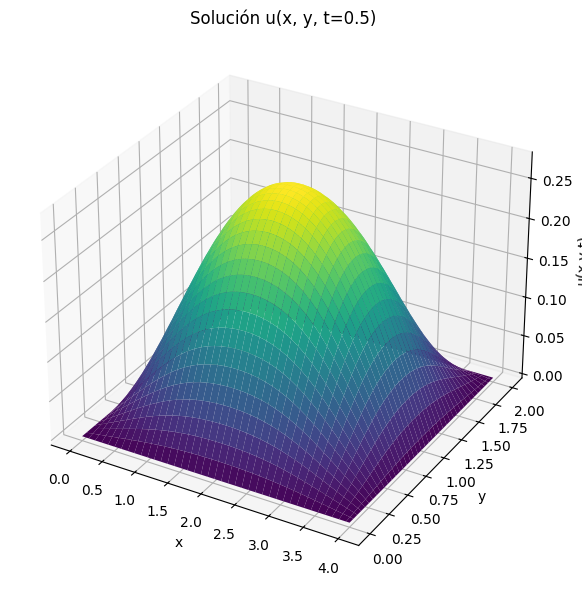

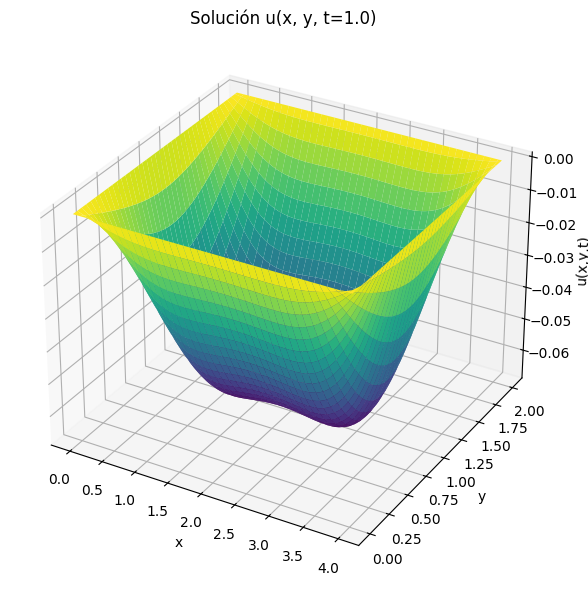

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Parámetros del problema
a = 4
b = 2
c = 1
M = 5
N = 5
Nx = 80
Ny = 80


# Condición inicial f(x, y)
def f_xy(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)



# Coeficientes A_mn
def A_mn(m, n):
    x = np.linspace(0, a, Nx)
    y = np.linspace(0, b, Ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    integrando = f_xy(X, Y) * np.sin(m * np.pi * X / a) * np.sin(n * np.pi * Y / b)
    dx = a / (Nx - 1)
    dy = b / (Ny - 1)
    integral = np.sum(integrando) * dx * dy
    return (4 / (a * b)) * integral


# Solución u(x, y, t)
def u(x, y, t):
    suma = 0.0
    for m in range(1, M+1):
        for n in range(1, N+1):
            Amn = A_mn(m, n)
            omega_mn = c * np.pi * np.sqrt((m / a)**2 + (n / b)**2)
            suma += Amn * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.cos(omega_mn * t)
    return suma


# Graficar u(x,y,t) para un tiempo dado
def graficar_solucion(t):
    x = np.linspace(0, a, Nx)
    y = np.linspace(0, b, Ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    U = np.zeros_like(X)

    for i in range(Nx):
        for j in range(Ny):
            U[i, j] = u(X[i, j], Y[i, j], t)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, U, cmap='viridis')
    ax.set_title(f'Solución u(x, y, t={t})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u(x,y,t)')
    plt.tight_layout()
    plt.show()


# Ejemplo de uso para distintos tiempos
graficar_solucion(t=0)    # Condición inicial
graficar_solucion(t=0.5)  # Tiempo intermedio
graficar_solucion(t=1.0)  # Tiempo posterior